In [21]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
pathname = '/Users/diyadoshi/Documents/accepted_2007_to_2018Q4.csv'
df = pd.read_csv(pathname)
print(df.shape)
df.head()

/var/folders/pw/rtr07675107fvmf8dp_fk8qh0000gn/T/ipykernel_10016/4089098481.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pathname)


(2260701, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


##Dropping Columns

drop columns with 50%+ missing data

In [23]:
missing_percent = df.isnull().mean() * 100
high_missing_cols = missing_percent[missing_percent > 50].index.tolist()

print("Columns with >60% missing values:")
print(high_missing_cols)
df = df.drop(columns=high_missing_cols)


Columns with >60% missing values:
['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlemen

drop columns with no relevance

In [24]:
drop_for_eda = ['id', 'url', 'title', 'zip_code', 'emp_title', 'policy_code']
df = df.drop(columns=[c for c in drop_for_eda if c in df.columns])

In [25]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent

il_util                    47.281042
mths_since_rcnt_il         40.251099
all_util                   38.323555
open_acc_6m                38.313912
inq_last_12m               38.313912
                             ...    
collection_recovery_fee     0.001460
last_pymnt_amnt             0.001460
last_fico_range_high        0.001460
last_fico_range_low         0.001460
debt_settlement_flag        0.001460
Length: 101, dtype: float64

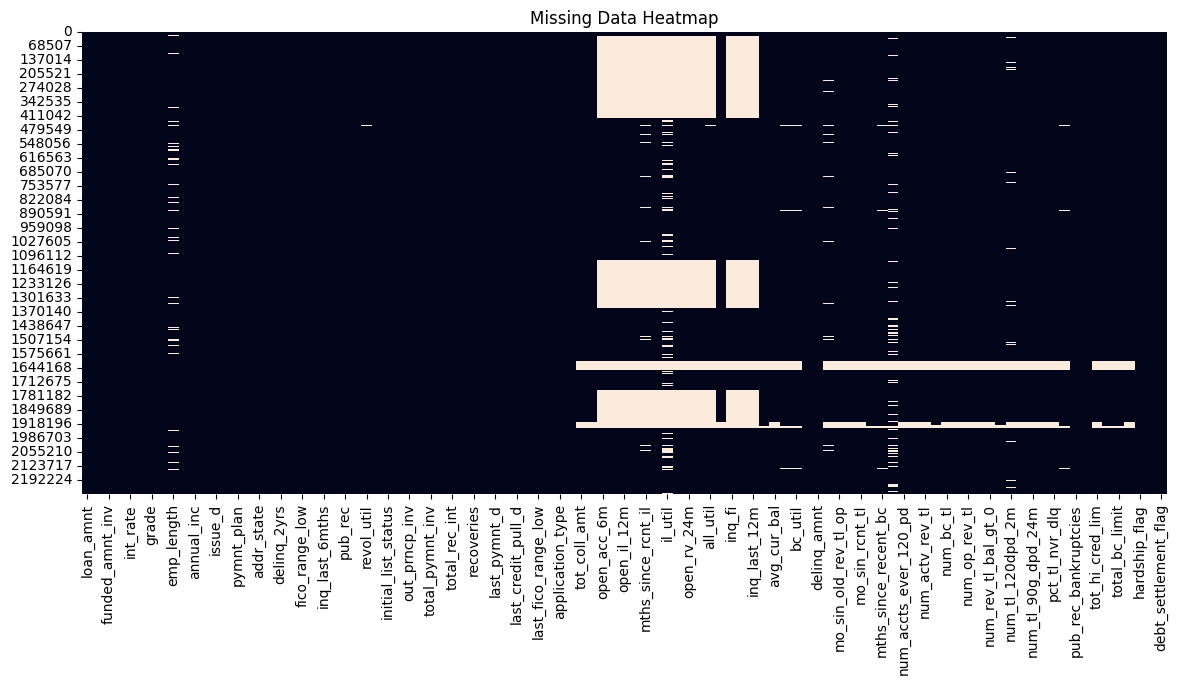

In [26]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


##Grouping Loan Status into 3 categories

In [27]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [28]:
def map_status(x):
    if x in ['Fully Paid',
             'Does not meet the credit policy. Status:Fully Paid']:
        return 'paid'
    elif x in ['Charged Off', 'Default',
               'Does not meet the credit policy. Status:Charged Off']:
        return 'default'
    else:
        return 'other'   # Current, Late, Grace Period


df['loan_status_grouped'] = df['loan_status'].apply(map_status)
df['loan_status_grouped'].value_counts()


loan_status_grouped
paid       1078739
other       912602
default     269360
Name: count, dtype: int64

<Axes: xlabel='grade', ylabel='loan_status_grouped'>

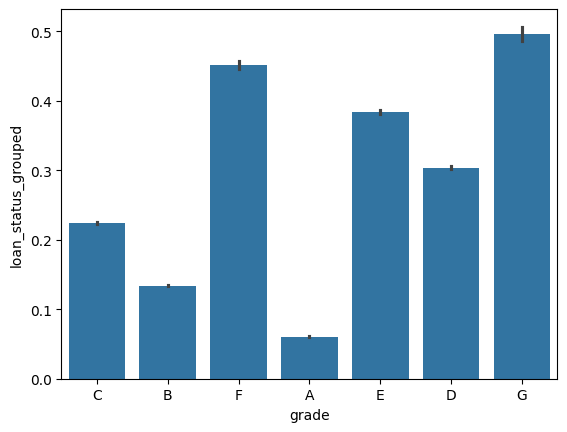

In [29]:
sns.barplot(data=df[df['loan_status_grouped']!='other'],
            x='grade',
            y=df['loan_status_grouped'].apply(lambda x: 1 if x=='default' else 0))


In [30]:
pd.crosstab(df['purpose'], df['loan_status_grouped'], normalize='index')

loan_status_grouped,default,other,paid
purpose,,,
car,0.089826,0.389831,0.520343
credit_card,0.096827,0.428159,0.475013
debt_consolidation,0.129376,0.388484,0.482140
educational,0.207547,0.002358,0.790094
home_improvement,0.103525,0.416970,0.479506
house,0.113115,0.483729,0.403155
major_purchase,0.108990,0.414213,0.476797
medical,0.124091,0.431970,0.443939
moving,0.144712,0.381549,0.473739


<Axes: xlabel='loan_status_grouped', ylabel='int_rate'>

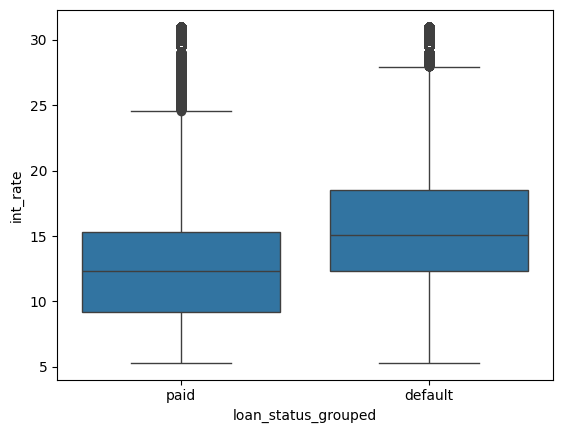

In [31]:
sns.boxplot(data=df[df['loan_status_grouped']!='other'],
            x='loan_status_grouped', y='int_rate')


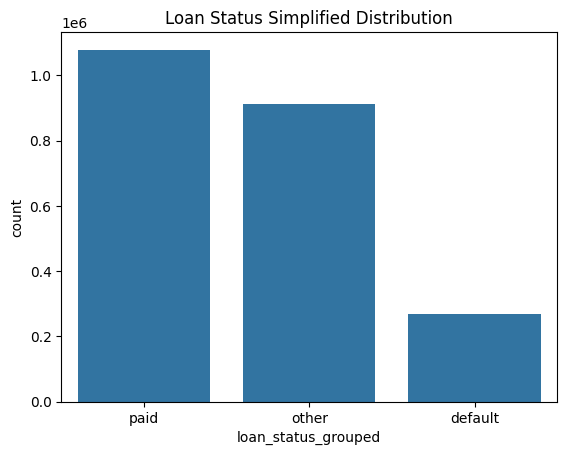

In [32]:
sns.countplot(data=df, x='loan_status_grouped')
plt.title("Loan Status Simplified Distribution")
plt.show()


##Visualisations

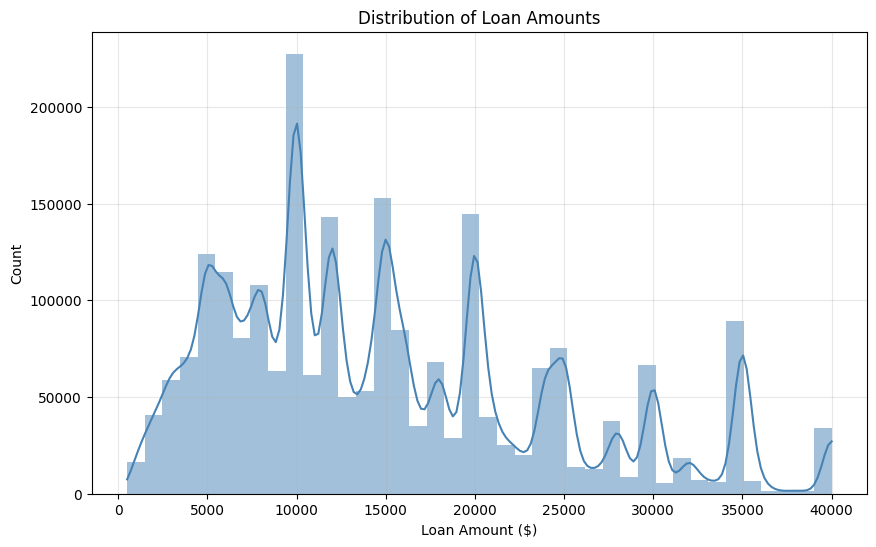

In [33]:
plt.figure(figsize=(10,6))

sns.histplot(
    df['loan_amnt'],
    bins=40,                  # smoother + fewer bins
    kde=True,
    color='steelblue',
    edgecolor=None
)

plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Count")
plt.grid(alpha=0.3)

plt.show()


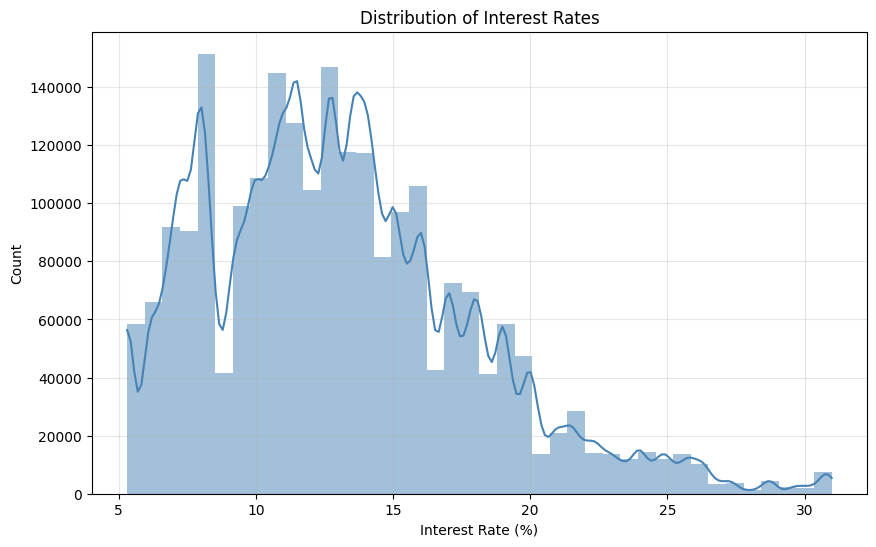

In [34]:
plt.figure(figsize=(10,6))

sns.histplot(
    df['int_rate'],
    bins=40,          # smoother bins
    kde=True,
    color='steelblue',
    edgecolor=None
)

plt.title("Distribution of Interest Rates")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Count")
plt.grid(alpha=0.3)

plt.show()


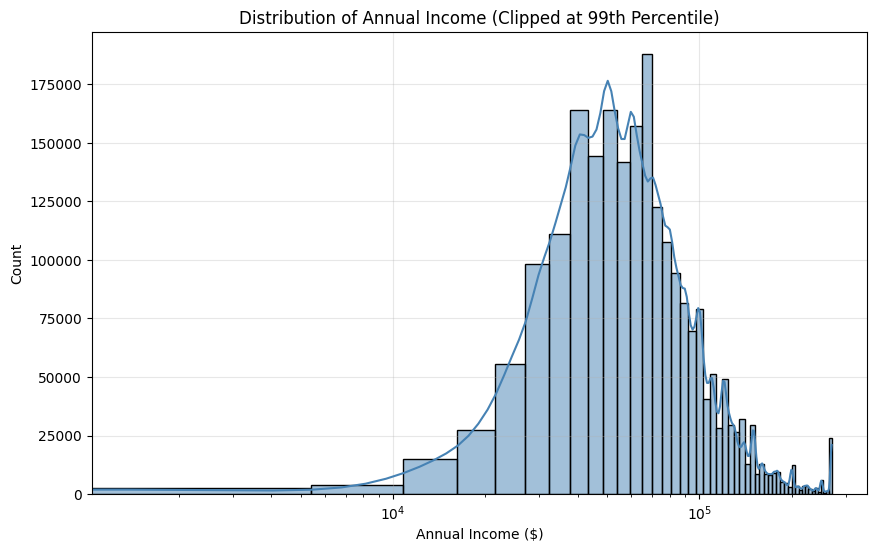

In [35]:
plt.figure(figsize=(10,6))

income_clipped = df['annual_inc'].clip(upper=df['annual_inc'].quantile(0.99))

sns.histplot(income_clipped, bins=50, kde=True, color='steelblue')
plt.title("Distribution of Annual Income (Clipped at 99th Percentile)")
plt.xlabel("Annual Income ($)")
plt.ylabel("Count")
plt.xscale('log')
plt.grid(alpha=0.3)

plt.show()


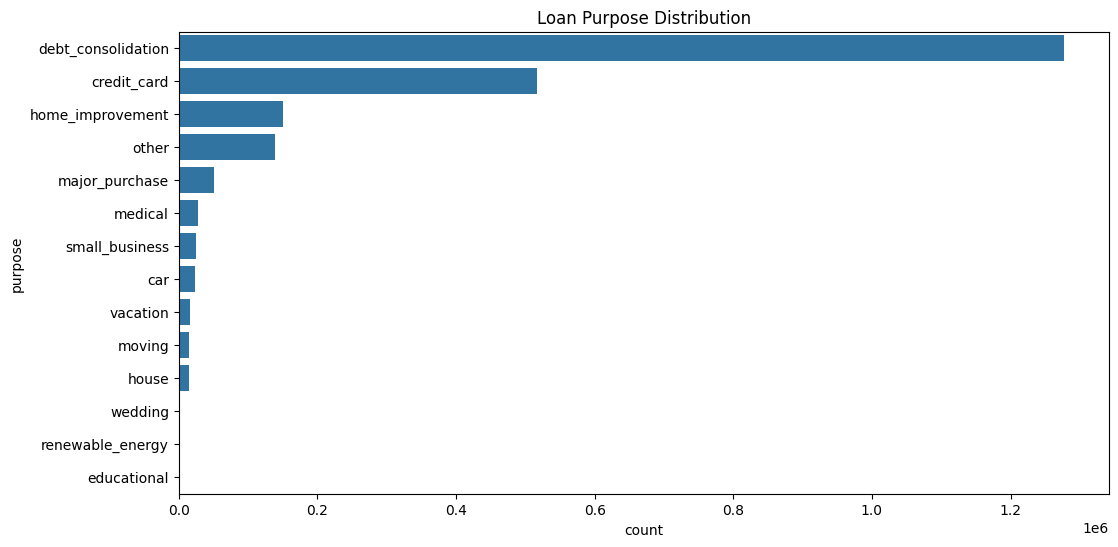

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index)
plt.title("Loan Purpose Distribution")
plt.show()


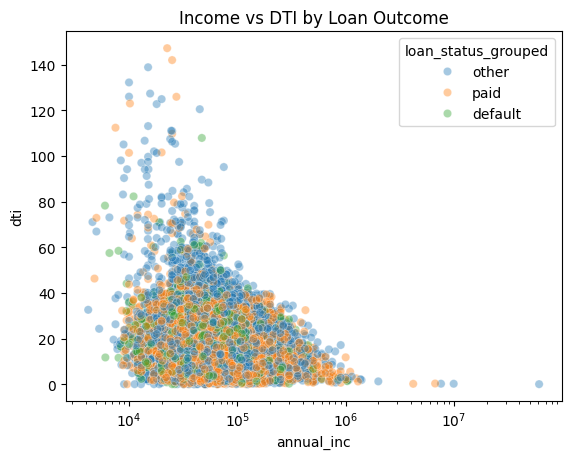

In [37]:
df_filtered = df[df['dti'] < 150]  # remove extreme unrealistic DTI values

sns.scatterplot(
    data=df_filtered.sample(50000),
    x='annual_inc', y='dti', hue='loan_status_grouped',
    alpha=0.4
)
plt.xscale('log')
plt.title("Income vs DTI by Loan Outcome")
plt.show()


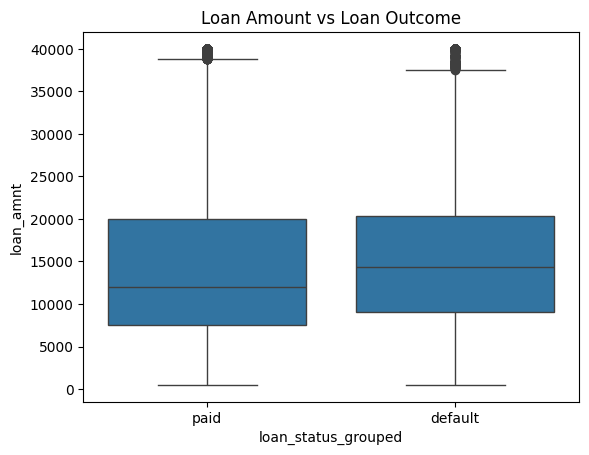

In [38]:
sns.boxplot(data=df[df['loan_status_grouped']!='other'],
            x='loan_status_grouped', y='loan_amnt')
plt.title("Loan Amount vs Loan Outcome")
plt.show()


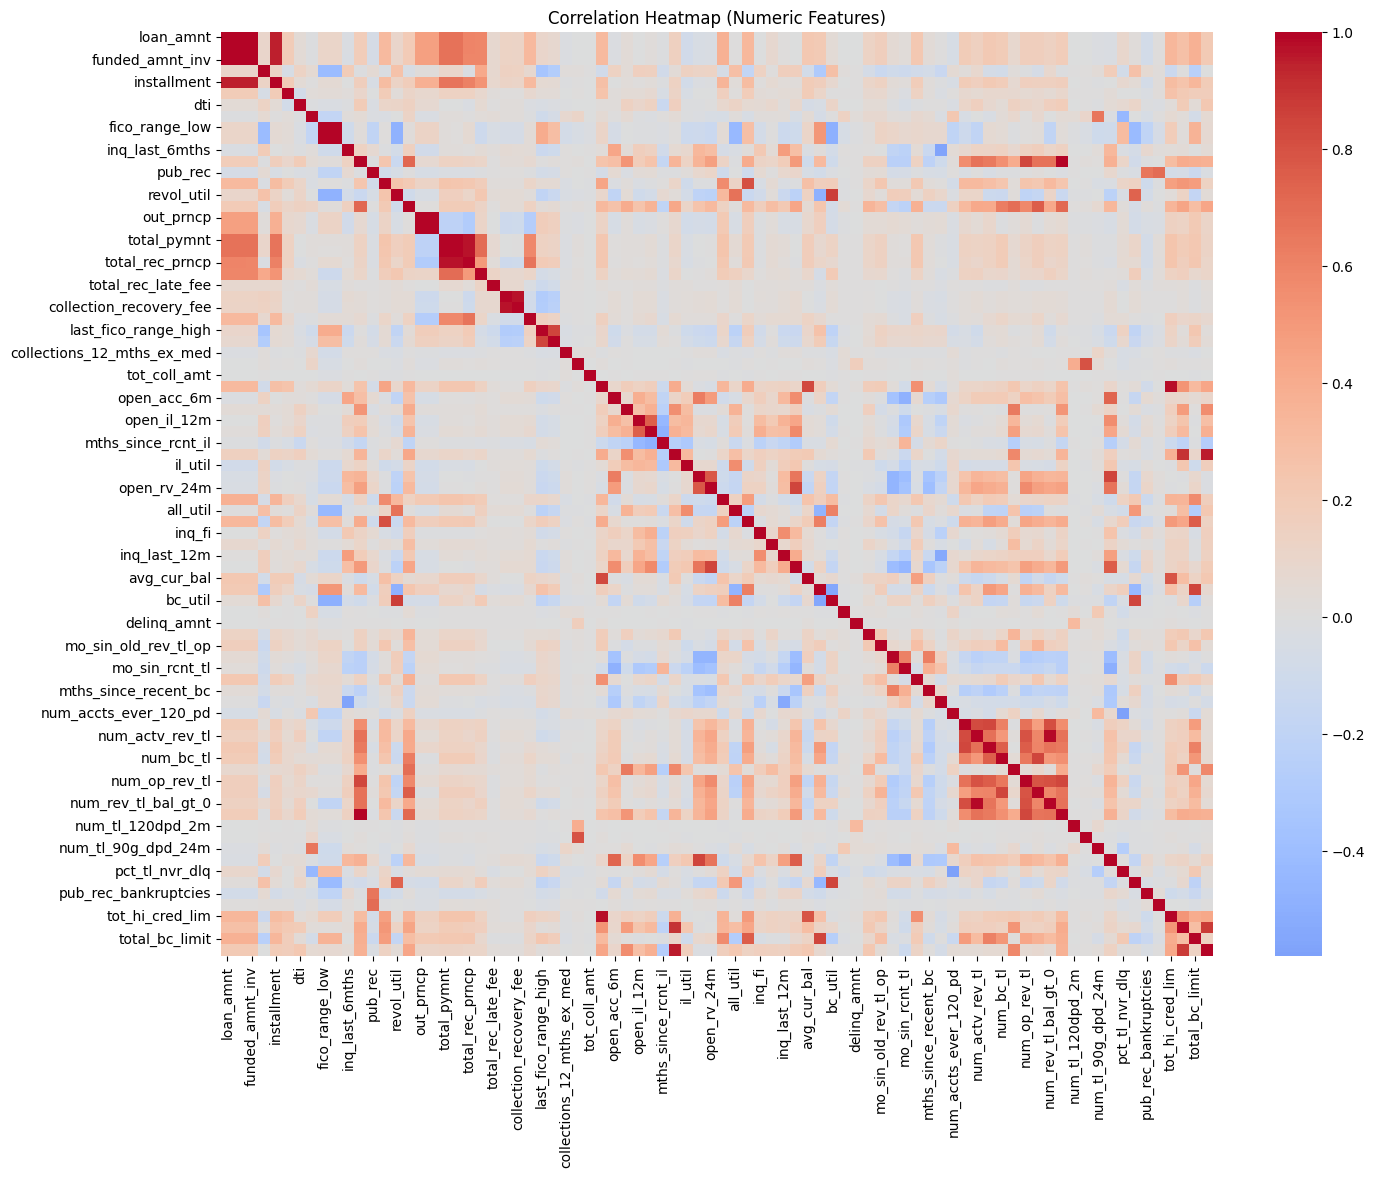

In [39]:
plt.figure(figsize=(16,12))
# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


###QUESTION 1 — Which borrower attributes most strongly influence default risk?

In [40]:
def target_numeric(x):
    if x == 'paid':
        return 0
    elif x == 'default':
        return 1
    else:
        return np.nan   # ignore 'other' for correlation

df['target'] = df['loan_status_grouped'].apply(target_numeric)

/var/folders/pw/rtr07675107fvmf8dp_fk8qh0000gn/T/ipykernel_10016/3243639412.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target[:20], y=corr_target[:20].index, palette='viridis')


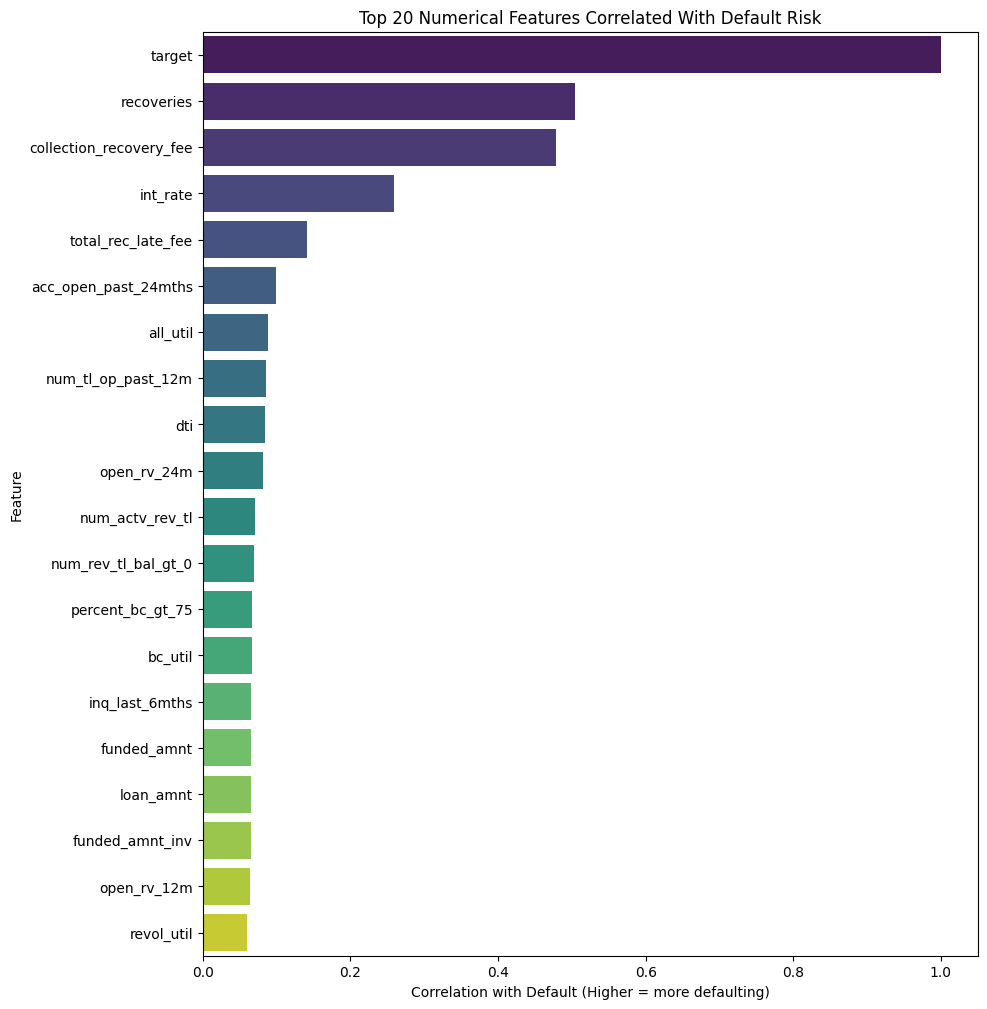

In [41]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlations with target
corr_target = numeric_df.corr()['target'].sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x=corr_target[:20], y=corr_target[:20].index, palette='viridis')
plt.title("Top 20 Numerical Features Correlated With Default Risk")
plt.xlabel("Correlation with Default (Higher = more defaulting)")
plt.ylabel("Feature")
plt.show()


###How does loan purpose impact default rates?

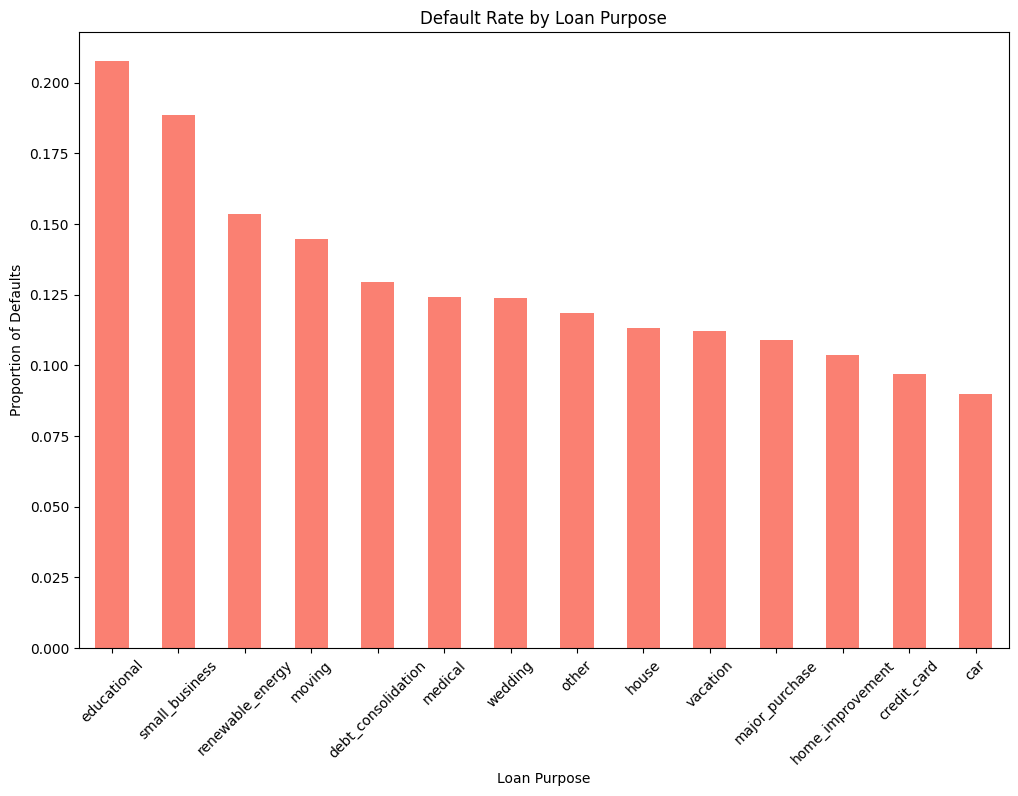

loan_status_grouped,default,other,paid
purpose,,,
car,0.089826,0.389831,0.520343
credit_card,0.096827,0.428159,0.475013
debt_consolidation,0.129376,0.388484,0.482140
educational,0.207547,0.002358,0.790094
home_improvement,0.103525,0.416970,0.479506
house,0.113115,0.483729,0.403155
major_purchase,0.108990,0.414213,0.476797
medical,0.124091,0.431970,0.443939
moving,0.144712,0.381549,0.473739


In [42]:
purpose_default = pd.crosstab(df['purpose'],
                              df['loan_status_grouped'],
                              normalize='index')

plt.figure(figsize=(12,8))
purpose_default['default'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Default Rate by Loan Purpose")
plt.ylabel("Proportion of Defaults")
plt.xlabel("Loan Purpose")
plt.xticks(rotation=45)
plt.show()

purpose_default


###QUESTION 3 — Do higher interest rates correlate with higher probability of default?

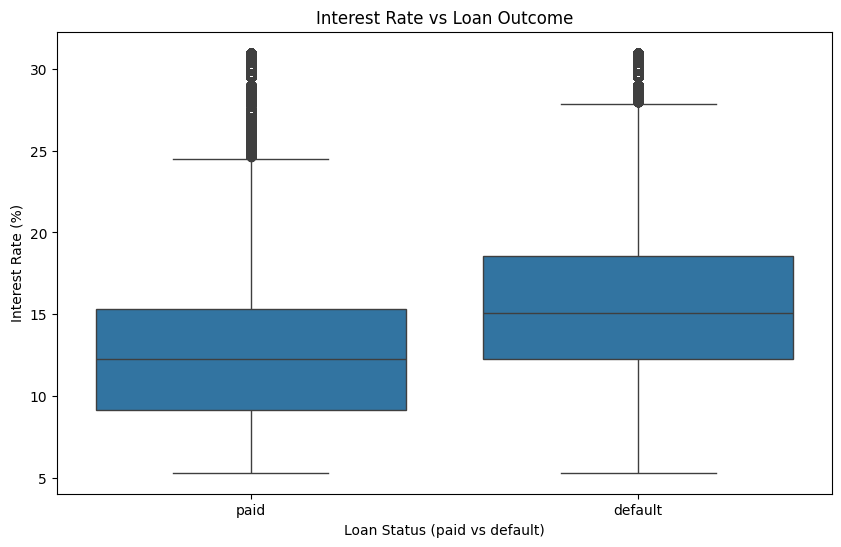

In [43]:
df_filtered = df[df['loan_status_grouped'] != 'other']

plt.figure(figsize=(10,6))
sns.boxplot(data=df_filtered, x='loan_status_grouped', y='int_rate')
plt.title("Interest Rate vs Loan Outcome")
plt.xlabel("Loan Status (paid vs default)")
plt.ylabel("Interest Rate (%)")
plt.show()

###QUESTION 4 — How does loan grade/subgrade distribution affect repayment behavior?

/var/folders/pw/rtr07675107fvmf8dp_fk8qh0000gn/T/ipykernel_10016/2481290075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


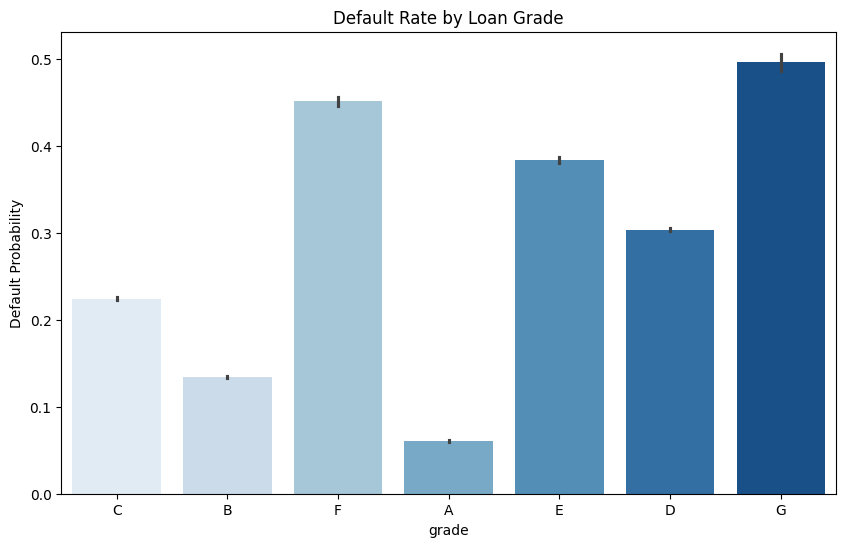

/var/folders/pw/rtr07675107fvmf8dp_fk8qh0000gn/T/ipykernel_10016/2481290075.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


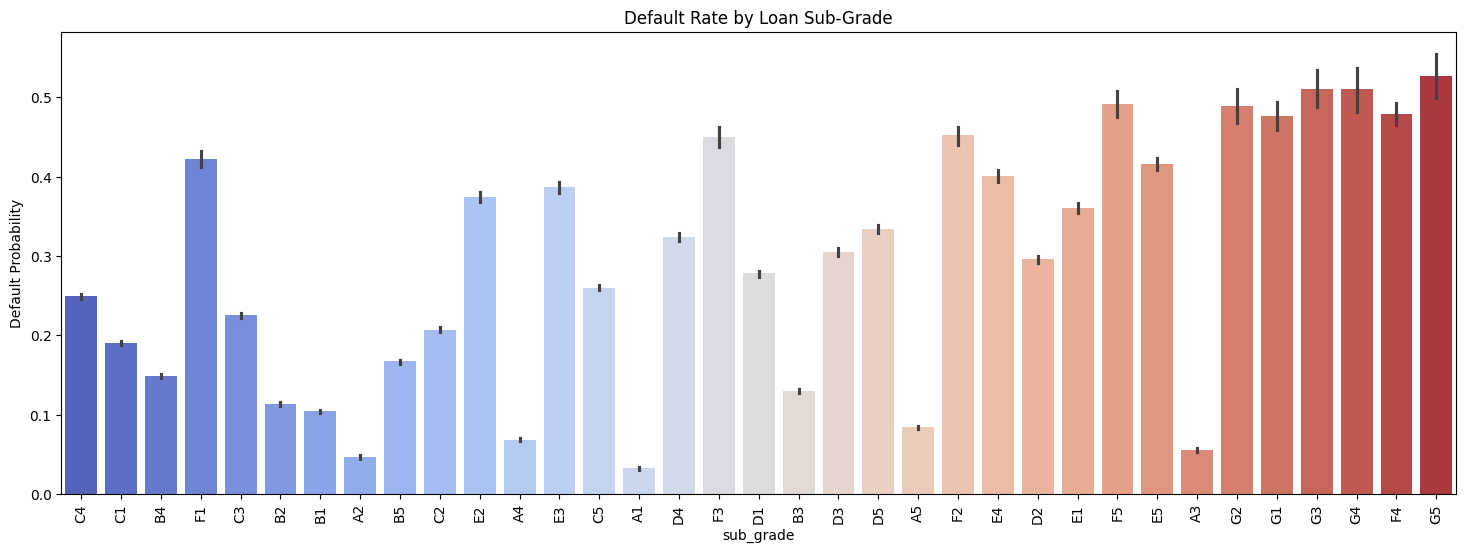

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_filtered,
    x='grade',
    y=df_filtered['loan_status_grouped'].apply(lambda x: 1 if x=='default' else 0),
    palette='Blues'
)
plt.title("Default Rate by Loan Grade")
plt.ylabel("Default Probability")
plt.show()

# Plot default rate per sub-grade
plt.figure(figsize=(18,6))
sns.barplot(
    data=df_filtered,
    x='sub_grade',
    y=df_filtered['loan_status_grouped'].apply(lambda x: 1 if x=='default' else 0),
    palette='coolwarm'
)
plt.title("Default Rate by Loan Sub-Grade")
plt.xticks(rotation=90)
plt.ylabel("Default Probability")
plt.show()

###QUESTION 5 — Can we predict default probability using historical borrower patterns?

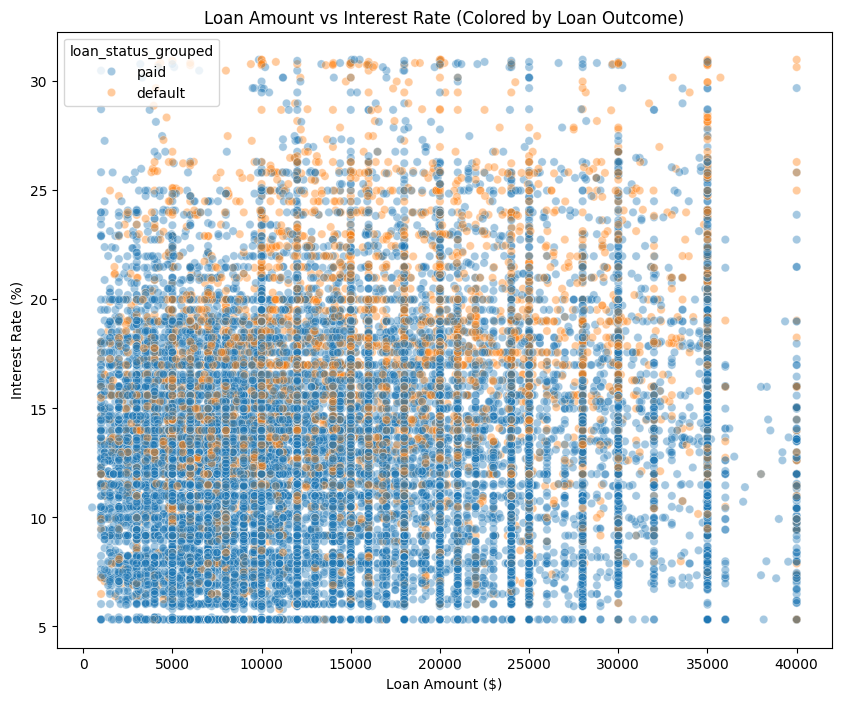

In [45]:
df_sample = df[df['loan_status_grouped']!='other'].sample(30000)

plt.figure(figsize=(10,8))
sns.scatterplot(
    data=df_sample,
    x='loan_amnt',
    y='int_rate',
    hue='loan_status_grouped',
    alpha=0.4
)
plt.title("Loan Amount vs Interest Rate (Colored by Loan Outcome)")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Interest Rate (%)")
plt.show()